In [1]:
%matplotlib inline

In [2]:
import tifffile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision_multi import transform_multi
from torchvision_multi.datasets import image_loader

this module is design for multi-channel image tranform of pytorch. for now all the input image should be numpy.ndarray.

there are three way to use this module.

1. independence use: you can use the function or class independently.
2. input transform: purpose for image classification
    - single label classification
    - multi label classification
3. input and target transform simultaneously: purpose for image semantic segmentation and instance segmentation


## 1. Independence Use
you can use this module independence 

In [3]:
# loading data and show the original image
img_tif = tifffile.imread('./sample-data/7-channel.tif')
img_jpg = Image.open('./sample-data/2007_000129.jpg')
# img_tif = img_tif.astype(np.float, copy=False) # covert the original image float32 to uint32

float32 (461, 633, 7)


(<matplotlib.figure.Figure at 0x7efdf723ca90>,
 <matplotlib.image.AxesImage at 0x7efda0d05470>)

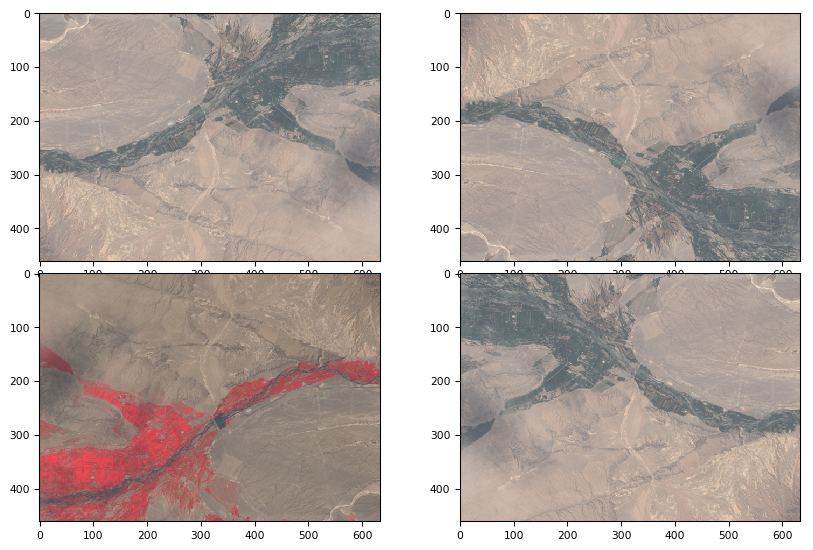

In [4]:
#flip the image and the plot them
fig = plt.figure(figsize=(16,8))
img_tif_flip_0 = transform_multi.flip(img_tif, 0)
img_tif_flip_neg = transform_multi.flip(img_tif, -1)
img_tif_flip_pos = transform_multi.flip(img_tif, 1)
print(img_tif_flip_0.dtype, img_tif_flip_0.shape)
tifffile.imshow(img_tif[:,:,[3,2,1]], subplot=221)  #original
tifffile.imshow(img_tif_flip_0[:,:,[3,2,1]], figure=fig, subplot=222)  #top bottom
tifffile.imshow(img_tif_flip_neg[:,:,[4,3,2]], figure=fig, subplot=223)  #left right 
tifffile.imshow(img_tif_flip_pos[:,:,[3,2,1]], figure=fig, subplot=224)  #top bottom and then left right

## 2. input transform
purpose for image classification
 - single label classification
 - multi label classification

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader

batch: 0 ........
<class 'torch.FloatTensor'> torch.Size([4, 7, 461, 633])
<class 'torch.LongTensor'> torch.Size([4])


<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
batch: 1 ........
<class 'torch.FloatTensor'> torch.Size([4, 7, 461, 633])
<class 'torch.LongTensor'> torch.Size([4])


<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
batch: 2 ........
<class 'torch.FloatTensor'> torch.Size([4, 7, 461, 633])
<class 'torch.LongTensor'> torch.Size([4])


<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691


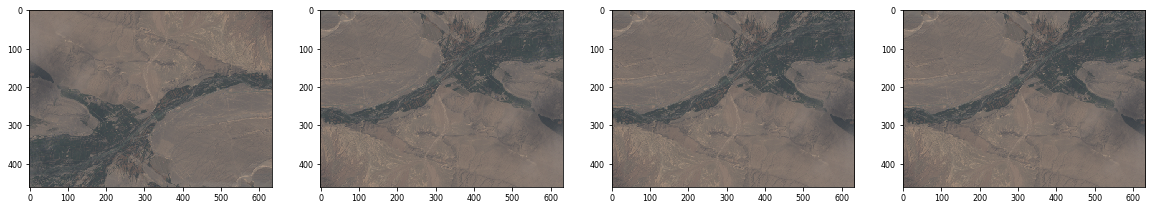

In [23]:
fig = plt.figure(figsize=(20,6))

batch_size=4
transform = transform_multi.Compose([
    transform_multi.RandomFlip(),
    transform_multi.Lambda(lambda x: transform_multi.to_tensor(x))
])
trainset = image_loader.SingleLabelImageLoader(
    root='./sample-data/', lstpath='./sample-data/parse_single_lstfile_tiff.lst',
    filetype='tif', transform=transform 
    )
trainloader = DataLoader(dataset=trainset,batch_size=batch_size,shuffle=False)

for idx, (images, targets) in enumerate(trainloader):
    print('batch: {} ........'.format(idx))
    print(type(images), images.shape)
    print(type(targets), targets.shape)
    print('\n')
    
    # Variable, cuda
    # net feed forward
    # loss
    # back propagation
     
    #plot
    for idx, item in enumerate(images):
        item = torch.squeeze(item,0)
        img_ndarr = transform_multi.to_ndarray(item)
        subplot = int(''.join(str(x) for x in [1, batch_size, idx+1]))
        print(type(img_ndarr), img_ndarr.size)
        tifffile.imshow(img_ndarr[:,:,[3,2,1]], figure=fig, subplot=subplot)  #top bottom
        plt.savefig('./sample-data/plot/{}.png'.format(idx), bbox_inches='tight')
#     break


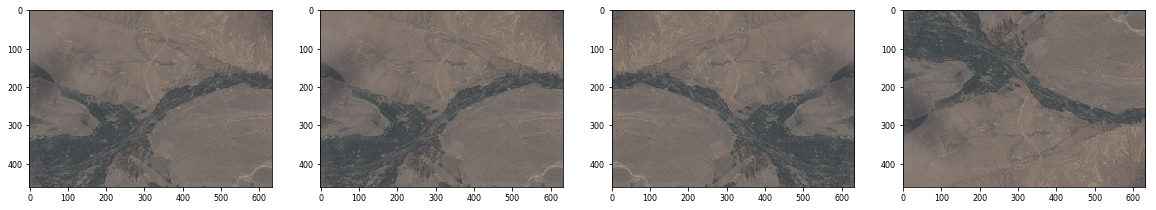

In [24]:
from IPython.display import Image
Image("sample-data/plot/0.png")

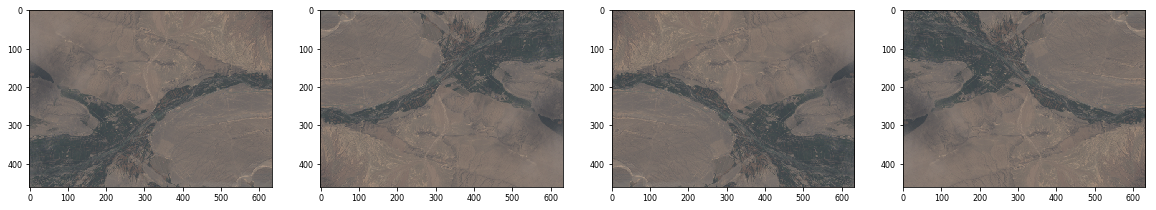

In [25]:
Image("sample-data/plot/1.png")

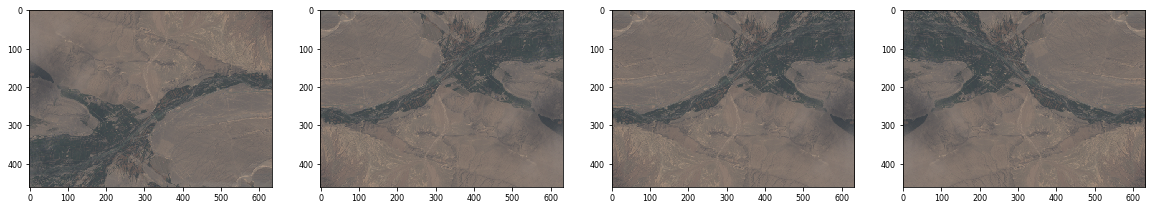

In [26]:
Image("sample-data/plot/2.png")

---

## 3. input and target transform simultaneously

purpose for image semantic segmentation and instance segmentation